In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [0]:
#
# load the data
#
df = pd.read_csv('synth_temp.csv')

In [0]:
#
# slice 1902 and forward
#
df = df.loc[df.Year > 1901]
df.head()

,Temperature,Year
366,16.973653,1902
367,17.181773,1903
368,17.436933,1904
369,17.688948,1905
370,17.811166,1906


In [0]:
#
# roll up by year
#
df_group_year = df.groupby('Year').agg(['mean']).droplevel(1, axis = 1)
#
# note that the .droplevel() method removes the multiindex 
# added by the .agg() method() to make things simpler
# later on in our analysis
#

In [0]:
#
# add the Year column so we can use that in a model
#
df_group_year['Year'] = df_group_year.index

In [0]:
#
# construct the model and inspect results
#
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_group_year['Year'].values.reshape((-1, 1)),
                 df_group_year.Temperature)
print('model slope = ', linear_model.coef_[0])
print('model intercept = ', linear_model.intercept_)
r2 = linear_model.score(df_group_year['Year'].values.reshape((-1, 1)),
                 df_group_year.Temperature)
print('r squared = ', r2)

model slope =  0.02314646083665401
model intercept =  -27.080386658043412
r squared =  0.8618387639193759


In [0]:
#
# generate predictions for visualization
#
pred_X = df_group_year.loc[:, 'Year']
pred_Y = linear_model.predict(df_group_year['Year'].values.reshape((-1, 1)))

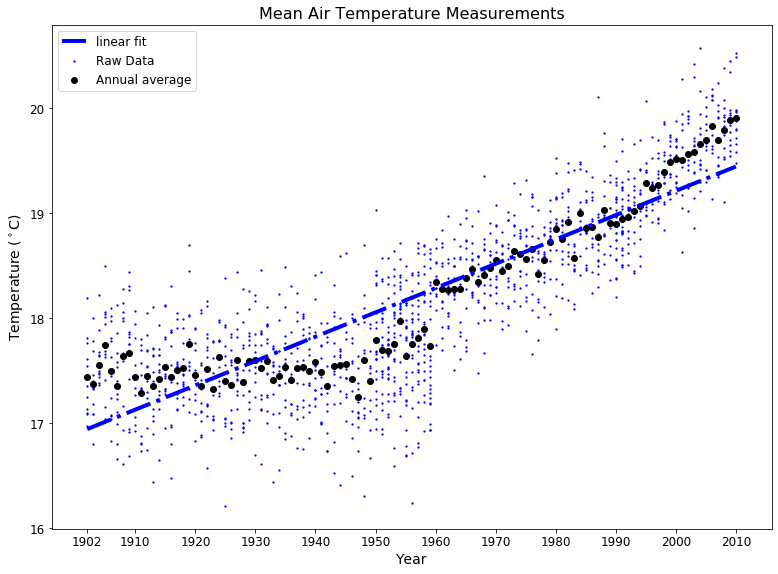

In [0]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.Temperature, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
#
# Annual averages
#
ax.scatter(df_group_year.Year, 
           df_group_year.Temperature, 
           label = 'Annual average', c = 'k')
#
# linear fit
#
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)